In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvisa
import time

In [651]:
sampling_frequency=656250/210
sampling_timestep=1/sampling_frequency

initial_current=101.3
end_current=initial_current-18.5
trajectory_duration=5

timesteps=np.arange(0,trajectory_duration,sampling_timestep)
def current(t):
    return np.interp(t,[0,100e-3],[0,initial_current],left=0,right=initial_current)
def current_round_trip(t):
    return np.interp(t,[0,2.5,5],[initial_current,end_current,initial_current],left=initial_current,right=initial_current)
def current_single(t):
    return np.interp(t,[0,5],[initial_current,end_current],left=initial_current,right=end_current)
def current_round_trip(t):
    return initial_current+(1-np.cos(2*np.pi*t/5))/2*(end_current-initial_current)
    


currents=current_round_trip(timesteps)




In [518]:
len(currents)

15625

Text(0, 0.5, 'Current')

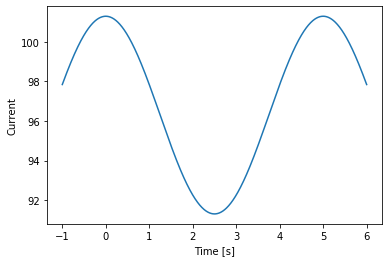

In [621]:
time=np.linspace(-1,6,1000)
plt.plot(time,current_round_trip(time))
plt.xlabel("Time [s]")
plt.ylabel("Current")

In [457]:
rm = pyvisa.ResourceManager()
rm.list_resources()
inst = rm.open_resource("ASRL12::INSTR")
inst.read_termination = '\n'
inst.write_termination = '\n'
print(inst.query("*IDN?"))

Lens driver


In [652]:
inst.write(":SOURCE:ARB:SEQ {}".format(len(currents)))
for i in range(len(currents)):
    inst.write("{}".format(currents[i]))

In [653]:
inst.query(":SOURCE:ARB:SEQ?")

'101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2955 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 101.2878 

In [623]:
inst.query(":TEMP:PID:OUT?"),inst.query(":TEMP:MEAS?")

('-0.18\r', '23.0625\r')

In [531]:
inst.write(":TEMP:PID:I?")

(16, <StatusCode.success: 0>)

In [558]:
inst.query(":TEMP:PID:I?")

'0.05\r'

In [1215]:
time.time(),float(inst.query(":TEMP:MEAS?")[:-1]),float(inst.query(":TEMP:PID:OUT?")[:-1])

(1595616002.7154548, 22.1875, -0.74)

In [1224]:
while(True):
    with open("temperature.txt", "a") as myfile:
        myfile.write(str(time.time())+" "+inst.query(":TEMP:MEAS?")[:-1])
        +" "+inst.query(":TEMP:PID:OUT?")[:-1]+"\n")
        time.sleep(0.1)

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [512]:
inst.query(":SOURCE:CUR?")

'0.00\r'

In [456]:
inst.close()